In [1]:
import n2

[11:20:37,745] INFO: python 3.6.5
[11:20:37,746] INFO: n2-tools 0.0.13


In [2]:
import numpy

In [3]:
from astropy.units import deg
from astropy.units import km
from astropy.units import s

In [4]:
# using FUGIN data
# see https://nro-fugin.github.io/
#  ! caution !  file size is too large 1.24 GB
d = n2.open_fits('http://jvo.nao.ac.jp/skynode/do/download/nobeyama/fugin/fugin_meta/FGN00000036')

[11:20:39,130] INFO: (open_fits) path=http://jvo.nao.ac.jp/skynode/do/download/nobeyama/fugin/fugin_meta/FGN00000036, hdu_num=0


In [5]:
cd = d.cut_world(x=(15.4*deg, 14.8*deg), y=(-0.9*deg, -0.4*deg), z=(0*km/s, 30*km/s))

[11:20:39,645] INFO: (cut_world) x=(<Quantity 15.4 deg>, <Quantity 14.8 deg>), y=(<Quantity -0.9 deg>, <Quantity -0.4 deg>), z=(<Quantity 0. km / s>, <Quantity 30. km / s>)
[11:20:39,646] DEBUG: (cut_world) original shape : (462, 848, 848)
[11:20:39,647] INFO: (cut_world) start calculation
[11:20:40,149] DEBUG: (cut_world_xy) pix range : x=[254, 508], y=[42, 254]
[11:20:40,156] DEBUG: (cut_world_z) pix range : z=[153, 199]
[11:20:40,159] INFO: (cut_world) done
[11:20:40,160] DEBUG: (cut_world) result shape : (46, 212, 254)
[11:20:40,793] DEBUG: (cache.make_cache_dir)
[11:20:40,794] INFO: (cache.save) .n2cache/b6ceaf4bb0a79c583fd4101032067838faca9c14


In [6]:
md = cd.moment_mask()

[11:20:40,815] INFO: (moment_mask) smooth_xy=0, smooth_v=0, nsig=5, minsize=5
[11:20:40,816] INFO: (moment_mask) start calculation
[11:20:40,962] DEBUG: (moment_mask) smoothed rms = 1.86
[11:20:41,051] DEBUG: (moment_mask) num of masked pixels = 2306106
[11:20:41,091] INFO: (moment_mask) done
[11:20:41,122] INFO: (cache.save) .n2cache/396bbccdd0b63384035dd34997e9a99c31a30123


In [7]:
d0 = md.mom0()
numpy.nansum(d0.data)

[11:20:41,159] DEBUG: (mom0) original bunit : K
[11:20:41,162] DEBUG: (mom0) original cunit3 : m / s
[11:20:41,164] INFO: (mom0) start calculation
[11:20:41,214] INFO: (mom0) done
[11:20:41,216] DEBUG: (mom0) new bunit : K km / s
[11:20:41,244] INFO: (cache.save) .n2cache/0c356849a571dd397f75aeae5b6af9f5a0886663


2199054.2

In [8]:
d1 = md.mom1()

[11:20:41,255] DEBUG: (mom1) original bunit : K
[11:20:41,256] DEBUG: (mom1) original cunit3 : m / s
[11:20:41,257] INFO: (mom1) start calculation
[11:20:41,342] INFO: (mom1) done
[11:20:41,343] DEBUG: (mom1) new bunit : km / s
[11:20:41,365] INFO: (cache.save) .n2cache/27e1f61e557d67bc2273107e856191a6afef3042


/Users/nishimura/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/nishimura/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [9]:
d2 = md.mom2()

[11:20:41,793] DEBUG: (mom2) original bunit : K
[11:20:41,794] DEBUG: (mom2) original cunit3 : m / s
[11:20:41,795] INFO: (mom2) start calculation
[11:20:41,930] INFO: (mom2) done
[11:20:41,932] DEBUG: (mom2) new bunit : km / s
[11:20:41,962] INFO: (cache.save) .n2cache/07ad978368f695591df02c9764a85610a1c2080b


/Users/nishimura/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/nishimura/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


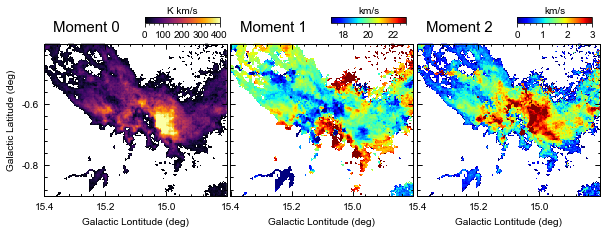

In [10]:
nx = d0.header['NAXIS1']
ny = d0.header['NAXIS2']
ncols = 3
nrows = 1

fig, ax = n2.plot.subplots(nx, ny, ncols, nrows, projection=d0.wcs, wspace=5, left=60, top=60)
im0 = ax[0].imshow(d0.data, vmin=0, vmax=400)
im1 = ax[1].imshow(d1.data, vmin=17, vmax=23, cmap='jet')
im2 = ax[2].imshow(d2.data, vmin=0, vmax=3, cmap='jet')
cax0 = n2.plot.colorbar(ax[0], im0, 'horizontal', space=0.01, start=0.55, stop=0.96, width=6)
cax0.ax.minorticks_on()
cax0.set_ticks(numpy.arange(0, 1000, 100))
cax0.set_label('K km/s', labelpad=-33, color='k')
cax0.ax.tick_params(which='both', colors='k', direction='out')
cax1 = n2.plot.colorbar(ax[1], im1, 'horizontal', space=0.01, start=0.55, stop=0.96, width=6)
cax1.ax.minorticks_on()
cax1.set_ticks(numpy.arange(-50, 50, 2))
cax1.set_label('km/s', labelpad=-33, color='k')
cax1.ax.tick_params(which='both', colors='k', direction='out')
cax2 = n2.plot.colorbar(ax[2], im2, 'horizontal', space=0.01, start=0.55, stop=0.96, width=6)
cax2.ax.minorticks_on()
cax2.set_ticks(numpy.arange(0, 10, 1))
cax2.set_label('km/s', labelpad=-33, color='k')
cax2.ax.tick_params(which='both', colors='k', direction='out')
[_a.coords[0].set_axislabel('Galactic Lontitude (deg)') for _a in ax]
[_a.coords[0].set_major_formatter('d.d') for _a in ax]
[_a.coords[0].set_ticks(spacing=0.2*deg, color='k', size=5) for _a in ax]
[_a.coords[0].display_minor_ticks(True) for _a in ax]
[_a.coords[1].set_axislabel('Galactic Latitude (deg)') for _a in ax]
[_a.coords[1].set_major_formatter('d.d') for _a in ax for _a in ax]
[_a.coords[1].set_ticklabel_visible(False) for i, _a in enumerate(ax) if i!=0]
[_a.coords[1].set_ticks(spacing=0.2*deg, color='k', size=5) for _a in ax]
[_a.coords[1].display_minor_ticks(True) for _a in ax]
ax[0].text(0.05, 1.11, 'Moment 0', size=15, ha='left', va='center', transform=ax[0].transAxes, clip_on=False)
ax[1].text(0.05, 1.11, 'Moment 1', size=15, ha='left', va='center', transform=ax[1].transAxes, clip_on=False)
ax[2].text(0.05, 1.11, 'Moment 2', size=15, ha='left', va='center', transform=ax[2].transAxes, clip_on=False)
fig.savefig('moment-0-1-2.jpg', dpi=50)